In [43]:
# Scientific imports

%matplotlib inline
from astropy.io import fits
import matplotlib.pyplot as plt
import numpy as np
from astroquery.mast import Observations
from astroquery.mast import Catalogs

# General imports

import csv, math, os, os.path, sys
import pandas as pd
import seaborn as sb
from sklearn import metrics
from IPython.display import display
sb.set()

# File imports

import data_header_check
import header_check

In [3]:
fitsList = []
fits_directories = [x[0] for x in os.walk('.')]

for fits_root, fits_dirs, fits_files in os.walk('.'):
    for fits_file in fits_files:
        fullpath = os.path.join(fits_root, fits_file)
        if (os.path.splitext(fullpath.lower())[1]).endswith('.fits'):
            fitsList.append(fullpath)
print("Number of FITS files: {}".format(len(fitsList)))

Number of FITS files: 28


In [18]:
def makePlot(file):
    with fits.open(file, mode="readonly") as hdulist:

        # Extract stellar parameters ffits.getheader(hdulist)rom the primary header.  We'll get the effective temperature, surface gravity,
        # and TESS magnitude.
        #####star_teff = hdulist[0].header['TEFF']
        #####star_logg = hdulist[0].hefits.getheader(hdulist)ader['LOGG']
        #####star_tmag = hdulis1t[0].header['TESSMAG']
        1
        # Extract some of the fit parameters for the first TCE.  These are stored in the FITS header of the first
        # extension.
        #####period = hdulist[1].header['TPERIOD']
        #####duration = hdulist[1].header['TDUR']Working on ifitsList = []
        #####epoch = hdulist[1].header['TEPOCH']
        #####depth = hdulist[1].header['TDEPTH']

        # Extract some of the columns of interest for the first TCE signal.  These are stored in the binary FITS table
        # in the first extension.  We'll extract the timestamps in TBJD, phase, initial fluxes, and corresponding
        # model fluxes.
        times = hdulist[1].data['TIME']
        #####phases = hdulist[1].data['PHASE']
        fluxes_init = hdulist[1].data['LC_INIT']
        #####model_fluxes_init = hdulist[1].data['MODEL_INIT']

        # Time to get a bit more modular!
        objName = hdulist[0].header['OBJECT']

    # First sort the phase and flux arrays by phase so we can draw the connecting lines between points.
    #####sort_indexes = np.argsort(phases)

    # Start figure and axis.
    fig, ax = plt.subplots(figsize=(20,8)) 

    # Plot the detrended fluxes as black circles.  We will plot them in sorted order.
    ax.plot(times, fluxes_init, 'ko',
           markersize=2)

    # Plot the model fluxes as a red line.  We will plot them in sorted order so the line connects between points cleanly.
    #####ax.plot(phases[sort_indexes], model_fluxes_init[sort_indexes], '-r')

    # Let's label the axes and define a title for the figure.
    fig.suptitle(objName + ' - Folded Lightcurve And Transit Model.')
    ax.set_ylabel("Flux (relative)")
    ax.set_xlabel("Time")

    plt.show()

In [30]:
# Let's make a list of ONLY light curves taken by the TESS mission

tessList = [fitsList[i] for i in range(len(fitsList)) if fits.getheader(fitsList[i])['TELESCOP'] == 'TESS']

In [74]:
def checkEssentials(file, log=False):
    with fits.open(file, mode="readonly") as f:
        
        flag = True
        fc = ["TIME", "LC_INIT"]
        
        for i in fc:
    
            try:
                times = f[1].data[i]
            except:
                flag = False
                if(log):
                    print("Header "+i+" not present")
    
    return flag

In [75]:
checkEssentials(fitsList[4], True)

True

In [92]:
c = 0
for i in range(len(tessList)):
    x = checkEssentials(tessList[i], True)
    c += x
    print("{}: {}".format(i, x))
    print("---")
print(c)

0: True
---
Header LC_INIT not present
1: False
---
Header LC_INIT not present
2: False
---
3: True
---
Header LC_INIT not present
4: False
---
Header LC_INIT not present
5: False
---
Header LC_INIT not present
6: False
---
Header LC_INIT not present
7: False
---
Header LC_INIT not present
8: False
---
Header LC_INIT not present
9: False
---
Header LC_INIT not present
10: False
---
Header LC_INIT not present
11: False
---
Header LC_INIT not present
12: False
---
Header LC_INIT not present
13: False
---
Header LC_INIT not present
14: False
---
Header LC_INIT not present
15: False
---
16: True
---
Header LC_INIT not present
17: False
---
Header LC_INIT not present
18: False
---
Header LC_INIT not present
19: False
---
Header LC_INIT not present
20: False
---
Header LC_INIT not present
21: False
---
Header LC_INIT not present
22: False
---
23: True
---
Header LC_INIT not present
24: False
---
Header LC_INIT not present
25: False
---
4


So, even though we have narrowed it down to only using TESS missions, only 4 out of the 26 missions had *both* "TIME" and "LC_INIT" Headers, with the missing culprit being "LC_INIT"  
This is... not wholly useful... I need to figure out why this is the case

In [100]:
fits.getdata(tessList[4]).columns

ColDefs(
    name = 'TIME'; format = 'D'; unit = 'BJD - 2457000, days'; disp = 'D14.7'
    name = 'TIMECORR'; format = 'E'; unit = 'd'; disp = 'E14.7'
    name = 'CADENCENO'; format = 'J'; disp = 'I10'
    name = 'SAP_FLUX'; format = 'E'; unit = 'e-/s'; disp = 'E14.7'
    name = 'SAP_FLUX_ERR'; format = 'E'; unit = 'e-/s'; disp = 'E14.7'
    name = 'SAP_BKG'; format = 'E'; unit = 'e-/s'; disp = 'E14.7'
    name = 'SAP_BKG_ERR'; format = 'E'; unit = 'e-/s'; disp = 'E14.7'
    name = 'PDCSAP_FLUX'; format = 'E'; unit = 'e-/s'; disp = 'E14.7'
    name = 'PDCSAP_FLUX_ERR'; format = 'E'; unit = 'e-/s'; disp = 'E14.7'
    name = 'QUALITY'; format = 'J'; disp = 'B16.16'
    name = 'PSF_CENTR1'; format = 'D'; unit = 'pixel'; disp = 'F10.5'
    name = 'PSF_CENTR1_ERR'; format = 'E'; unit = 'pixel'; disp = 'E14.7'
    name = 'PSF_CENTR2'; format = 'D'; unit = 'pixel'; disp = 'F10.5'
    name = 'PSF_CENTR2_ERR'; format = 'E'; unit = 'pixel'; disp = 'E14.7'
    name = 'MOM_CENTR1'; format = 'D'; u

No "LC_INIT" header present... so how does this file store a light curve?

In [106]:
def makeNewPlot(file, fluxParam):
    with fits.open(file, mode="readonly") as hdulist:

        times = hdulist[1].data['TIME']
        fluxes_init = hdulist[1].data[fluxParam]

        # Time to get a bit more modular!
        objName = hdulist[0].header['OBJECT']

     # Start figure and axis.
    fig, ax = plt.subplots(figsize=(20,8)) 

    # Plot the detrended fluxes as black circles.  We will plot them in sorted order.
    ax.plot(times, fluxes_init, 'ko',
           markersize=2)

    # Let's label the axes and define a title for the figure.
    fig.suptitle(objName + ' - Folded Lightcurve And Transit Model.')
    ax.set_ylabel("Flux (relative)")
    ax.set_xlabel("Time")

    plt.show()

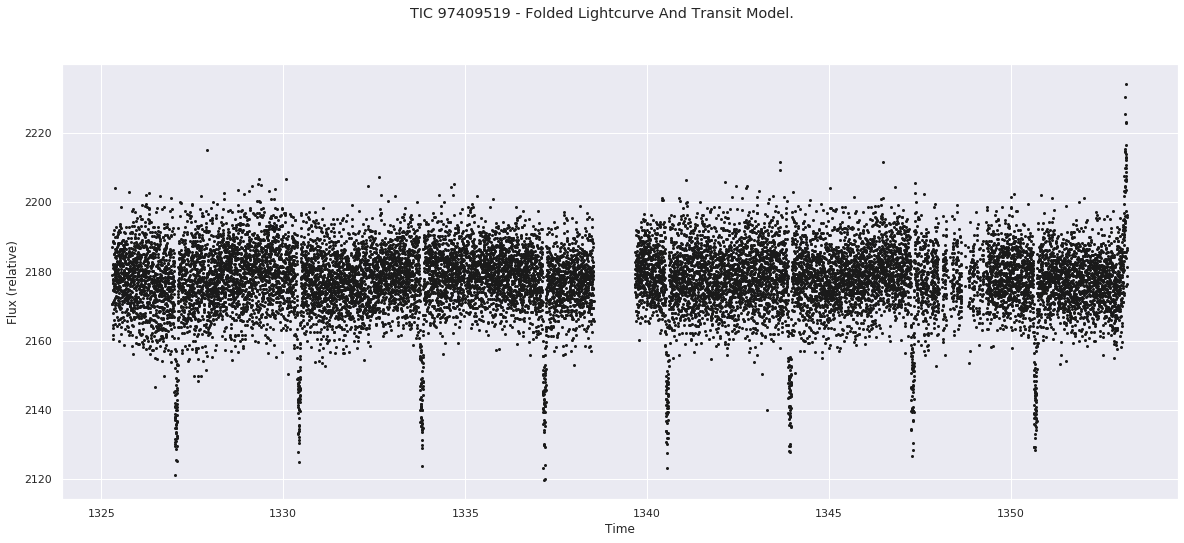

In [110]:
makeNewPlot(tessList[4], "PDCSAP_FLUX")

AH-HAH!!!!! We've only gone and done it, lads!!!

In [111]:
fits.getdata(tessList[0]).columns

ColDefs(
    name = 'TIME'; format = 'D'; unit = 'BJD - 2457000, days'; disp = 'D14.7'
    name = 'TIMECORR'; format = 'E'; unit = 'd'; disp = 'E14.7'
    name = 'CADENCENO'; format = 'J'; disp = 'I10'
    name = 'PHASE'; format = 'E'; unit = 'days'; disp = 'E14.7'
    name = 'LC_INIT'; format = 'E'; unit = 'dimensionless'; disp = 'E14.7'
    name = 'LC_INIT_ERR'; format = 'E'; unit = 'dimensionless'; disp = 'E14.7'
    name = 'LC_WHITE'; format = 'E'; unit = 'dimensionless'; disp = 'E14.7'
    name = 'LC_DETREND'; format = 'E'; unit = 'dimensionless'; disp = 'E14.7'
    name = 'MODEL_INIT'; format = 'E'; unit = 'dimensionless'; disp = 'E14.7'
    name = 'MODEL_WHITE'; format = 'E'; unit = 'dimensionless'; disp = 'E14.7'
)

So this "PDCSAP_FLUX" isn't in all of the others either - I was hoping that *that* would be the constant, but alas, t'is not the case.  
Time to redefine our function from earlier:

In [119]:
def checkEssentials(file, fluxArgs, log=False):
    with fits.open(file, mode="readonly") as f:
        
        flag = True
        
        for i in fluxArgs:
    
            try:
                times = f[1].data[i]
            except:
                flag = False
                if(log):
                    print("Header "+i+" not present")
    
    return flag

To test:

In [120]:
checkEssentials(tessList[4], ["TIME", "PDCSAP_FLUX"], True)

True

In [121]:
checkEssentials(tessList[0], ["TIME", "LC_INIT"], True)

True